In [1]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import datasets
from sklearn.svm import l1_min_c

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X = X[y != 2]
y = y[y != 2]
X /= X.max()  # Normalize X to speed-up convergence

penalty：可选择的值为"l1"和"l2"，分别对应L1的正则化和L2的正则化，默认是L2的正则化。

在调参时如果我们主要的目的只是为了解决过拟合，一般penalty选择L2正则化就够了。但是如果选择L2正则化发现还是过拟合，即预测效果差的时候，就可以考虑L1正则化。另外，如果模型的特征非常多，我们希望一些不重要的特征系数归零，从而让模型系数稀疏化的话，也可以使用L1正则化。

penalty参数的选择会影响损失函数优化算法的选择。即参数solver的选择，如果是L2正则化，那么4种可选的算法{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’}都可以选择。但是如果penalty是L1正则化的话，就只能选择‘liblinear’了。这是因为L1正则化的损失函数不是连续可导的，而{‘newton-cg’, ‘lbfgs’,‘sag’}这三种优化算法时都需要损失函数的一阶或者二阶连续导数，而‘liblinear’并没有这个依赖。

C：正则化强度（正则化系数λ）的倒数，必须是大于0的浮点数。C 值越小，则正则化强度越大。

In [3]:
clf = linear_model.LogisticRegression(penalty='l1', solver='liblinear',
                                      tol=1e-6, max_iter=int(1e6),
                                      warm_start=True,
                                      intercept_scaling=10000.)
coefs_ = []
cs = l1_min_c(X, y, loss='log') * np.logspace(0, 7, 16)
for c in cs:
    clf.set_params(C=c)
    clf.fit(X, y)
    coefs_.append(clf.coef_.ravel().copy())

coefs_ = np.array(coefs_)

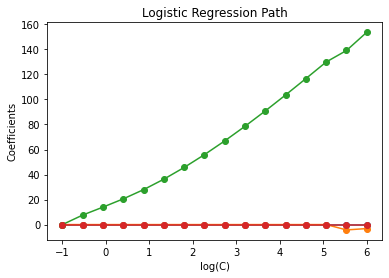

In [4]:
plt.plot(np.log10(cs), coefs_, marker='o')
ymin, ymax = plt.ylim()
plt.xlabel('log(C)')
plt.ylabel('Coefficients')
plt.title('Logistic Regression Path')
plt.axis('tight')
plt.show()